In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Breast_Cancer.csv")

In [3]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [4]:
print(df.head())



   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      1

In [5]:
# Display info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
# Check for missing values
print(df.isnull().sum())

# Check class distribution


Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


In [8]:
print(df['Status'].value_counts())

Status
Alive    3408
Dead      616
Name: count, dtype: int64


In [35]:
kf

Status
Alive    3408
Dead      616
Name: count, dtype: int64

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index([], dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())

   Age  Race  Marital Status  T Stage   N Stage  6th Stage  differentiate  \
0   68     2               1         0        0          0              1   
1   50     2               1         1        1          2              0   
2   58     2               0         2        2          4              0   
3   58     2               1         0        0          0              1   
4   47     2               1         1        0          1              1   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0      3        1           4                1                    1   
1      2        1          35                1                    1   
2      2        1          63                1                    1   
3      3        1          18                1                    1   
4      3        1          41                1                    1   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24         

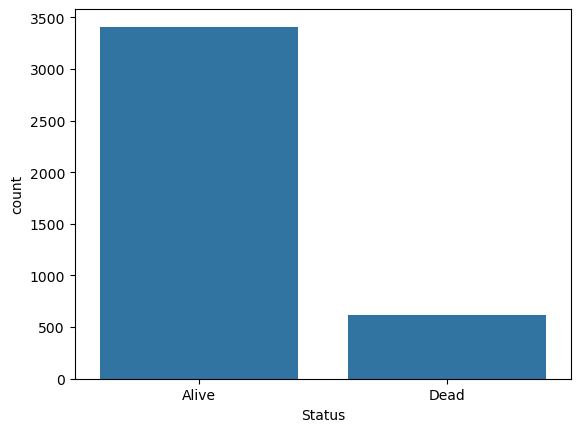

ValueError: could not convert string to float: 'White'

<Figure size 1200x800 with 0 Axes>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
sns.countplot(x='Status', data=df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
from imblearn.over_sampling import SMOTE

X = df.drop(['Status'], axis=1)
y = df['Status']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Status'], axis=1)
y = df['Status']

# Encoding target if it's categorical
if y.dtype == 'O':
    y = le.fit_transform(y)

# Balancing (SMOTE)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [47]:
# Create a crosstab: Smoking vs Recurred
ct = pd.crosstab(df['Smoking'], df['Recurred'])

# Plot the crosstab as a grouped bar chart
ct.plot(kind='bar', stacked=False, colormap='Set2')

# Chart customization
plt.title('Recurrence by Smoking Status')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Recurred')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'df_expanded' is not defined

In [49]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Example data
X = df.drop('Status', axis=1)
y = df['Status']

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Show as a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Optional: Plot
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


ValueError: could not convert string to float: 'White'

In [2]:
pip install lifelines


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/349.3 kB ? eta -:--:--
   ---------------------------------------- 349.3/349.3 kB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
   ---------------------------------------- 51.5/51.5 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/117.2 kB ? eta -:--:--
   ---------------------------------------- 117.2/117.2 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/376.9 kB ? eta -:--:--
   --------------------------------------- 376.9/376.9 kB 11.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4050 sha256=cf95b1f9829903f9ef7f6e032bb69ec1fe127744c38d0171a9535fea070dd045
  Stored in directory: c:\users\vijay\appdata\local\pip\cache\wheels\50\37\21\0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Suc

In [3]:
from lifelines import CoxPHFitter
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your dataset
df = pd.read_csv("Breast_Cancer.csv")

# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Status')
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Binary encoding for event: Dead = 1, Alive = 0
df['event'] = df['Status'].apply(lambda x: 1 if x.lower() == 'dead' else 0)
df.drop(columns=['Status'], inplace=True)

# Fit the Cox model
cph = CoxPHFitter()
cph.fit(df, duration_col='Survival Months', event_col='event')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 4024 total observations, 3408 right-censored observations>
             duration col = 'Survival Months'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 4024
number of events observed = 616
   partial log-likelihood = -4689.93
         time fit was run = 2025-07-22 12:52:58 UTC

---
                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                               
Age                     0.02      1.02      0.00            0.01            0.03                1.01                1.03
Race                   -0.15      0.87      0.06           -0.27           -0.02                0.76                0.98
Marital Status          0.05      1.05      0.04           -0.03            0.12                0.98                1.12
T Stage                 0.31      1.36      0.09            0.12            0.49                1.13                1.63
N Stage                 0.35      1.42      0.16            0.05            0.66                1.05                1.93
6th Stage              -0.01      0.99      0.10           -0.21            0.19                0.81                1.20
differentiate          -0.01      0.99      0.05           -0.10            0.09                0.90                1.09
Grade                   0.29      1.34      0.07            0.16            0.43                1.17                1.54
A Stage                -0.09      0.91      0.19           -0.46            0.27                0.63                1.31
Tumor Size             -0.00      1.00      0.00           -0.01            0.01                0.99                1.01
Estrogen Status        -0.71      0.49      0.14           -0.97           -0.44                0.38                0.64
Progesterone Status    -0.48      0.62      0.11           -0.69           -0.27                0.50                0.77
Regional Node Examined -0.03      0.97      0.01           -0.05           -0.02                0.96                0.98
Reginol Node Positive   0.06      1.06      0.01            0.04            0.08                1.04                1.08

                        cmp to     z      p  -log2(p)
covariate                                            
Age                       0.00  4.31 <0.005     15.92
Race                      0.00 -2.26   0.02      5.38
Marital Status            0.00  1.26   0.21      2.26
T Stage                   0.00  3.29 <0.005      9.98
N Stage                   0.00  2.27   0.02      5.42
6th Stage                 0.00 -0.10   0.92      0.12
differentiate             0.00 -0.17   0.87      0.21
Grade                     0.00  4.26 <0.005     15.58
A Stage                   0.00 -0.50   0.62      0.70
Tumor Size                0.00 -0.08   0.93      0.10
Estrogen Status           0.00 -5.21 <0.005     22.35
Progesterone Status       0.00 -4.44 <0.005     16.79
Regional Node Examined    0.00 -5.14 <0.005     21.76
Reginol Node Positive     0.00  5.20 <0.005     22.27
---
Concordance = 0.74
Partial AIC = 9407.86
log-likelihood ratio test = 458.08 on 14 df
-log2(p) of ll-ratio test = 292.85